In [23]:
# Standard library
from PIL import Image

# Third-party libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torch.nn import functional as F
from torch.autograd import Variable
%matplotlib inline


In [24]:
!mkdir saved_models

mkdir: cannot create directory ‘saved_models’: File exists


In [25]:
batch_size = 64
learning_rate = 3e-3
num_epochs = 20

In [28]:
# Load CIFAR-100 training and test datasets with corresponding preprocessing transforms
cifar100_datasets = {
    'train': torchvision.datasets.CIFAR100(
        root='data',              # Directory to store the dataset
        train=True,               # Load the training set
        download=True,            # Download if dataset is not already present
        transform=data_preprocessing_transforms['train']  # Apply training preprocessing
    ),
    'test': torchvision.datasets.CIFAR100(
        root='data',              # Same directory for test set
        train=False,              # Load the test set
        download=True,            # Download if needed
        transform=data_preprocessing_transforms['test']   # Apply test preprocessing
    )
}


Files already downloaded and verified
Files already downloaded and verified


In [29]:
# Load CIFAR-100 training and test datasets with corresponding preprocessing transforms
cifar100_datasets = {
    'train': torchvision.datasets.CIFAR100(
        root='data',              # Directory to store the dataset
        train=True,               # Load the training set
        download=True,            # Download if dataset is not already present
        transform=data_preprocessing_transforms['train']  # Apply training preprocessing
    ),
    'test': torchvision.datasets.CIFAR100(
        root='data',              # Same directory for test set
        train=False,              # Load the test set
        download=True,            # Download if needed
        transform=data_preprocessing_transforms['test']   # Apply test preprocessing
    )
}


Files already downloaded and verified
Files already downloaded and verified


In [30]:
print(cifar100_datasets['train'])
print('='*85)
print(cifar100_datasets['test'])

Dataset CIFAR100
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )
Dataset CIFAR100
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [8]:
dataloaders = {
    'train':
    torch.utils.data.DataLoader(data_sets['train'],
                                batch_size=batch_size,
                                shuffle=True,
                                num_workers=0),
    'test':
    torch.utils.data.DataLoader(data_sets['test'],
                                batch_size=batch_size,
                                shuffle=False,
                                num_workers=0)
}

In [35]:
print(torch.device("cuda:0" if torch.cuda.is_available() else "cpu"))

cuda:0


In [45]:
print(len(cifar100_datasets['train'].classes))

100


In [36]:
# Load the pretrained ResNet-50 model
resnet50_model = models.resnet50(pretrained=True)

# Move the model to GPU if CUDA is available
resnet50_model = resnet50_model.cuda() if use_cuda else resnet50_model

# Get the number of input features to the final fully connected (fc) layer
input_features = resnet50_model.fc.in_features

# Replace the original fully connected layer with a custom classifier
resnet50_model.fc = nn.Sequential(
    nn.Dropout(0.5),                           # Dropout to reduce overfitting
    nn.Linear(input_features, 1024),          # First FC layer
    nn.Dropout(0.2),
    nn.Linear(1024, 512),                     # Second FC layer
    nn.Dropout(0.2),
    nn.Linear(512, 256),                      # Third FC layer
    nn.Dropout(0.2),
    nn.Linear(256, 128),                      # Fourth FC layer
    nn.Dropout(0.2),
    nn.Linear(128, len(cifar100_datasets['train'].classes))  # Output layer
)

# Move the final classifier to GPU if CUDA is available
resnet50_model.fc = resnet50_model.fc.cuda() if use_cuda else resnet50_model.fc

# Define the loss function (Cross Entropy for multi-class classification)
loss_function = nn.CrossEntropyLoss()

# Define the optimizer (Stochastic Gradient Descent with momentum and weight decay)
optimizer = optim.SGD(
    resnet50_model.parameters(), 
    lr=learning_rate, 
    momentum=0.9, 
    weight_decay=5e-4
)

# Define a learning rate scheduler that decays LR every 10 epochs by a factor of 0.1
learning_rate_scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer, step_size=10, gamma=0.1
)


In [39]:
print(f"[DEBUG] Phase: {phase}, Correct: {correct_predictions}, Dataset size: {dataset_size}")


[DEBUG] Phase: test, Correct: 26438, Dataset size: 50000


🌀 Epoch 1/20

🌱 Epoch [1/20], Step [1/782], Loss: 1.1140
🌱 Epoch [1/20], Step [21/782], Loss: 1.3643
🌱 Epoch [1/20], Step [41/782], Loss: 0.9303
🌱 Epoch [1/20], Step [61/782], Loss: 0.9400
🌱 Epoch [1/20], Step [81/782], Loss: 0.9207
🌱 Epoch [1/20], Step [101/782], Loss: 0.9705
🌱 Epoch [1/20], Step [121/782], Loss: 0.6928
🌱 Epoch [1/20], Step [141/782], Loss: 0.8008
🌱 Epoch [1/20], Step [161/782], Loss: 0.9628
🌱 Epoch [1/20], Step [181/782], Loss: 0.8486
🌱 Epoch [1/20], Step [201/782], Loss: 1.2619
🌱 Epoch [1/20], Step [221/782], Loss: 1.2538
🌱 Epoch [1/20], Step [241/782], Loss: 1.3061
🌱 Epoch [1/20], Step [261/782], Loss: 0.9937
🌱 Epoch [1/20], Step [281/782], Loss: 1.2969
🌱 Epoch [1/20], Step [301/782], Loss: 1.2376
🌱 Epoch [1/20], Step [321/782], Loss: 0.6777
🌱 Epoch [1/20], Step [341/782], Loss: 1.2693
🌱 Epoch [1/20], Step [361/782], Loss: 1.1357
🌱 Epoch [1/20], Step [381/782], Loss: 1.1381
🌱 Epoch [1/20], Step [401/782], Loss: 1.1814
🌱 Epoch [1/20], Step [421/782], Loss: 0.9455
🌱 

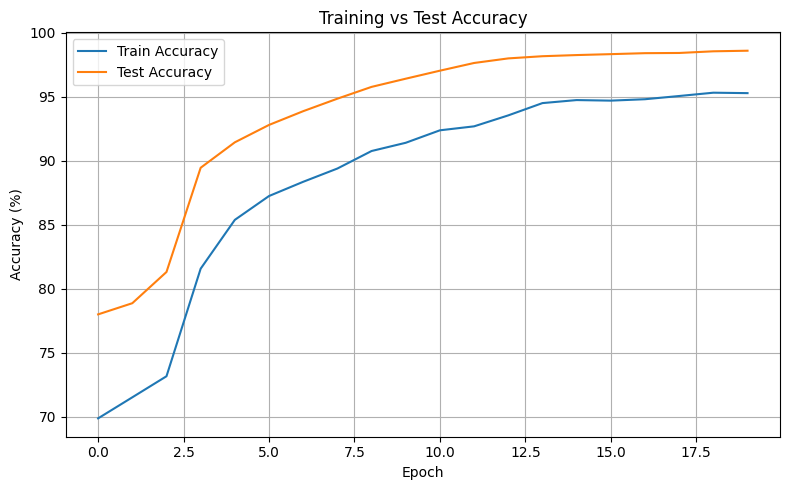

In [40]:
# Lists to store training and testing accuracy/loss over epochs
train_accuracies, test_accuracies = [], []
train_losses, test_losses = [], []

# Total number of training steps (batches per epoch)
total_batches = len(dataloaders['train'])

# Initialize the minimum test loss to a very large value
min_test_loss = np.Inf

# Start training loop
for epoch in range(num_epochs):
    print(f'🌀 Epoch {epoch + 1}/{num_epochs}\n')

    model_improved = False  # Flag to check if the model has improved on test set

    for phase in ['train', 'test']:
        epoch_loss = 0.0
        correct_predictions = 0
        total_samples = 0  # ✅ Make sure this is reset per phase

        # Set model mode
        if phase == 'train':
            resnet50_model.train()
        else:
            resnet50_model.eval()

        # Iterate through batches
        for batch_idx, (images, labels) in enumerate(dataloaders[phase]):
            batch_size = images.size(0)
            total_samples += batch_size

            if use_cuda:
                images = images.cuda()
                labels = labels.cuda()

            images = images.float()

            if phase == 'train':
                optimizer.zero_grad()
                outputs = resnet50_model(images)
                loss = loss_function(outputs, labels)
                loss.backward()
                optimizer.step()
            else:
                with torch.no_grad():
                    outputs = resnet50_model(images)
                    loss = loss_function(outputs, labels)

            _, predictions = torch.max(outputs, 1)
            correct_predictions += (predictions == labels).sum().item()
            epoch_loss += loss.item()

            # Intermediate logging
            if phase == 'train' and batch_idx % 20 == 0:
                print(f'🌱 Epoch [{epoch + 1}/{num_epochs}], Step [{batch_idx + 1}/{total_batches}], Loss: {loss.item():.4f}')

        # Adjust learning rate
        if phase == 'train':
            learning_rate_scheduler.step()

        # Compute average loss and accuracy for the epoch
        avg_loss = epoch_loss / total_samples
        accuracy_percent = (correct_predictions / total_samples) * 100

        # Store results
        if phase == 'train':
            train_losses.append(avg_loss)
            train_accuracies.append(accuracy_percent)
        else:
            test_losses.append(avg_loss)
            test_accuracies.append(accuracy_percent)

            model_improved = avg_loss < min_test_loss
            if model_improved:
                min_test_loss = avg_loss

    # Epoch summary
    print(f'✅ Train Loss: {train_losses[-1]:.4f}, Accuracy: {train_accuracies[-1]:.2f}%')
    print(f'🔍 Test  Loss: {test_losses[-1]:.4f}, Accuracy: {test_accuracies[-1]:.2f}%\n')

    # Save best model
    if model_improved:
        torch.save(resnet50_model.state_dict(), 'saved_models/weights.h5')
        print('💾 Improvement detected — model saved.\n')

# 📈 Plot accuracy curve
plt.figure(figsize=(8, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Test Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


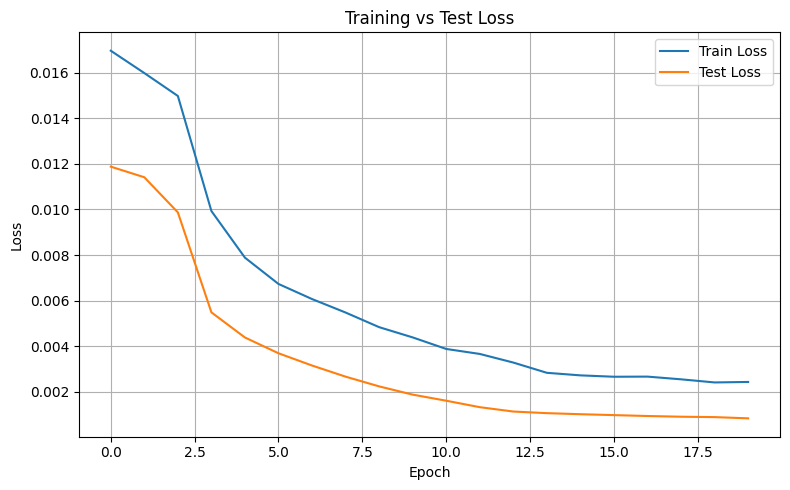

In [44]:
# 📉 Plot loss curve
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Test Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
# Set model to evaluation mode
resnet50_model.eval()

# Initialize counters
correct = 0
total = 0

# Turn off gradients for testing
with torch.no_grad():
    for images, labels in dataloaders['test']:
        if use_cuda:
            images, labels = images.cuda(), labels.cuda()

        outputs = resnet50_model(images.float())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate and print overall accuracy
accuracy = 100 * correct / total
print(f'✅ Test Accuracy on {total} test images: {accuracy:.2f}%')


✅ Test Accuracy on 50000 test images: 98.59%


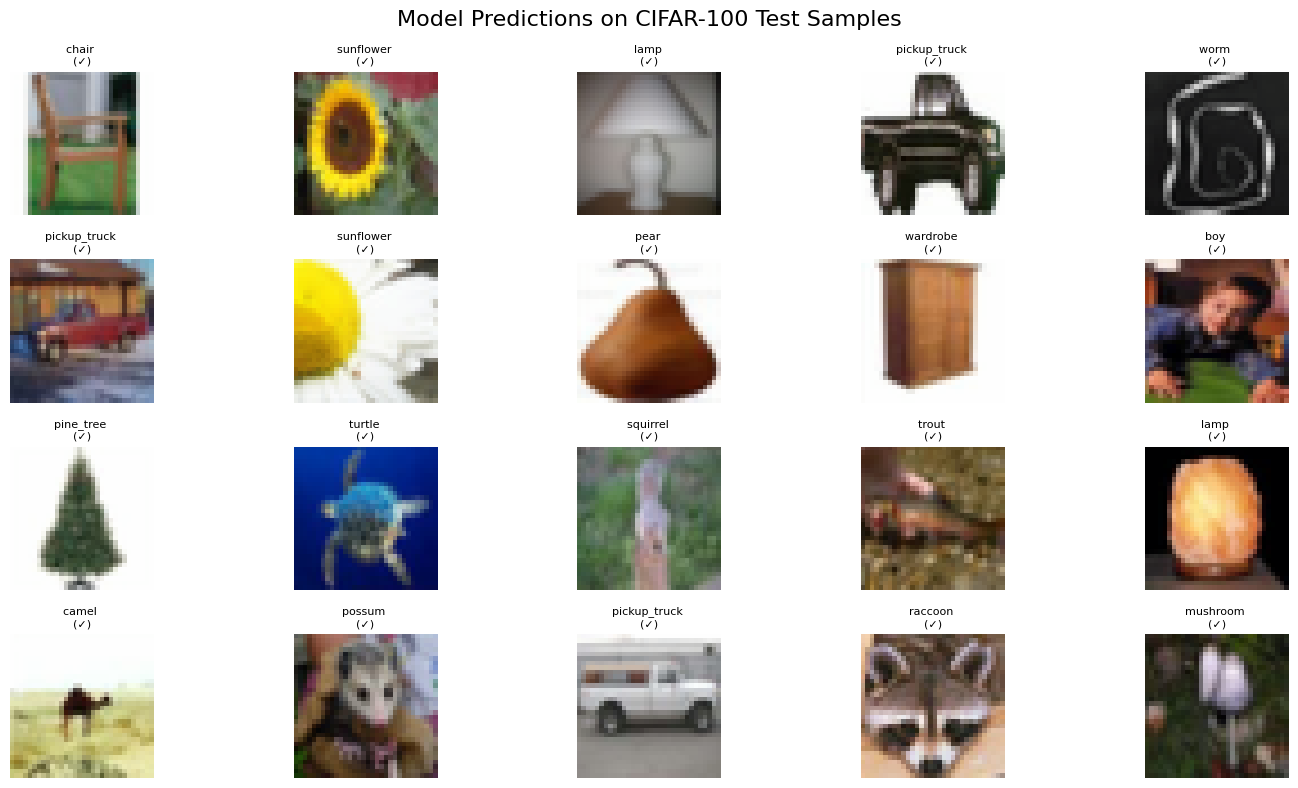

In [47]:
resnet50_model.eval()
num = 20  # number of images to visualize
rows, cols = 4, 5  # 4 rows × 5 columns

# Get random 20 images from test set
classes = data_sets['test'].classes
indices = list(range(len(data_sets['test'])))
np.random.shuffle(indices)
idx = indices[:num]
from torch.utils.data.sampler import SubsetRandomSampler
sampler = SubsetRandomSampler(idx)
loader = torch.utils.data.DataLoader(data_sets['test'], sampler=sampler, batch_size=num)
dataiter = iter(loader)
images, labels = next(dataiter)

# Move data to CUDA if needed
if use_cuda:
    images, labels = images.cuda(), labels.cuda()

# Run inference
outputs = resnet50_model(images)
_, preds = torch.max(outputs.data, 1)

# Convert to CPU for visualization
images = images.cpu()
preds = preds.cpu().numpy()
labels = labels.cpu().numpy()

# Helper to show image
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.4914, 0.4822, 0.4465])
    std = np.array([0.2023, 0.1994, 0.2010])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title:
        plt.title(title, fontsize=8)
    plt.axis('off')

# Plotting
plt.figure(figsize=(15, 8))
for i in range(num):
    plt.subplot(rows, cols, i + 1)
    correct = preds[i] == labels[i]
    title_text = f'{classes[preds[i]]} \n({"✓" if correct else "✗"})'
    imshow(images[i], title=title_text)

plt.suptitle('Model Predictions on CIFAR-100 Test Samples', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
import torch
import torchvision.transforms as transforms
import copy

# CIFAR-100 
CIFAR100_MEAN = (0.5071, 0.4865, 0.4409)
CIFAR100_STD = (0.2673, 0.2564, 0.2761)

class AddGaussianNoise(object):
    def __init__(self, std=0.1):
        self.std = std
    def __call__(self, tensor):
        return tensor + torch.randn_like(tensor) * self.std

def add_salt_pepper(img_tensor, severity=0.1):
    tensor = img_tensor.clone()
    c, h, w = tensor.shape
    num_salt = int(severity * h * w / 2)
    num_pepper = int(severity * h * w / 2)
    coords_salt = [torch.randint(0, i, (num_salt,)) for i in (c, h, w)]
    coords_pepper = [torch.randint(0, i, (num_pepper,)) for i in (c, h, w)]
    tensor[coords_salt[0], coords_salt[1], coords_salt[2]] = 1.0
    tensor[coords_pepper[0], coords_pepper[1], coords_pepper[2]] = 0.0
    return tensor

def adjust_brightness(factor):
    return transforms.Lambda(lambda x: transforms.functional.adjust_brightness(x, factor))

def adjust_contrast(factor):
    return transforms.Lambda(lambda x: transforms.functional.adjust_contrast(x, factor))

def random_patch_mask(img_tensor, patch_size=8, mask_ratio=0.15):
    img = img_tensor.clone()
    _, h, w = img.shape
    num_patches_h = h // patch_size
    num_patches_w = w // patch_size
    total_patches = num_patches_h * num_patches_w
    num_mask = int(total_patches * mask_ratio)
    mask_indices = torch.randperm(total_patches)[:num_mask]
    for idx in mask_indices:
        i = idx // num_patches_w
        j = idx % num_patches_w
        img[:, i*patch_size:(i+1)*patch_size, j*patch_size:(j+1)*patch_size] = 0.0
    return img

#  dataloader
def create_perturbed_dataloaders(original_dataset, batch_size=64):
    severities = [1, 2, 3, 4, 5]
    perturbed_dataloaders = {
        'Gaussian': {},
        'SaltPepper': {},
        'Brightness': {},
        'Contrast': {},
        'Mask': {}
    }

    for level in severities:
        gaussian_std = 0.02 * level
        sp_level = 0.05 * level
        brightness_factor = 0.75 + 0.25 * level
        contrast_factor = 0.75 + 0.25 * level
        mask_ratio = 0.15 * level

        perturbs = {
            'Gaussian': transforms.Lambda(lambda x: AddGaussianNoise(gaussian_std)(x)),
            'SaltPepper': transforms.Lambda(lambda x: add_salt_pepper(x, sp_level)),
            'Brightness': adjust_brightness(brightness_factor),
            'Contrast': adjust_contrast(contrast_factor),
            'Mask': transforms.Lambda(lambda x: random_patch_mask(x, patch_size=8, mask_ratio=mask_ratio))
        }

        for perturb_type, perturb_fn in perturbs.items():
            temp_dataset = copy.deepcopy(original_dataset)
            temp_dataset.transform = transforms.Compose([
                transforms.ToTensor(),
                perturb_fn,
                transforms.Normalize(CIFAR100_MEAN, CIFAR100_STD)
            ])
            loader = torch.utils.data.DataLoader(temp_dataset, batch_size=batch_size, shuffle=False)
            perturbed_dataloaders[perturb_type][level] = loader

    return perturbed_dataloaders


In [17]:
perturbed_loaders = create_perturbed_dataloaders(data_sets['test'], batch_size=128)


In [18]:
import torch
from tqdm import tqdm

@torch.no_grad()
def evaluate(model, dataloader, device='cuda'):
    model.eval()
    correct = 0
    total = 0
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    return correct / total * 100  # Top-1 accuracy

def evaluate_all_perturbations(model, perturbed_loaders, device='cuda'):
    results = {}
    print("⚙️ Evaluating model under all perturbations...\n")
    for perturb_type in perturbed_loaders:
        results[perturb_type] = {}
        for level in sorted(perturbed_loaders[perturb_type].keys()):
            loader = perturbed_loaders[perturb_type][level]
            acc = evaluate(model, loader, device=device)
            results[perturb_type][level] = acc
            print(f"✅ {perturb_type} - Level {level}: {acc:.2f}%")
    return results


In [19]:
results = evaluate_all_perturbations(model, perturbed_loaders, device='cuda')


⚙️ Evaluating model under all perturbations...

✅ Gaussian - Level 1: 34.83%
✅ Gaussian - Level 2: 34.99%
✅ Gaussian - Level 3: 34.82%
✅ Gaussian - Level 4: 34.80%
✅ Gaussian - Level 5: 34.78%
✅ SaltPepper - Level 1: 13.73%
✅ SaltPepper - Level 2: 13.47%
✅ SaltPepper - Level 3: 13.52%
✅ SaltPepper - Level 4: 13.50%
✅ SaltPepper - Level 5: 13.44%
✅ Brightness - Level 1: 94.16%
✅ Brightness - Level 2: 93.08%
✅ Brightness - Level 3: 83.64%
✅ Brightness - Level 4: 70.44%
✅ Brightness - Level 5: 57.74%
✅ Contrast - Level 1: 94.16%
✅ Contrast - Level 2: 96.21%
✅ Contrast - Level 3: 94.23%
✅ Contrast - Level 4: 89.71%
✅ Contrast - Level 5: 83.46%
✅ Mask - Level 1: 2.34%
✅ Mask - Level 2: 2.38%
✅ Mask - Level 3: 2.44%
✅ Mask - Level 4: 2.47%
✅ Mask - Level 5: 2.44%


Files already downloaded and verified


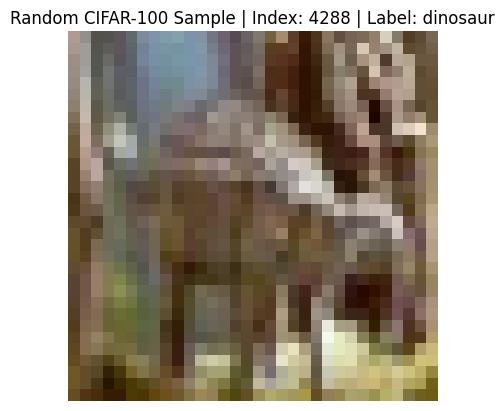

In [ ]:
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms
import numpy as np
import random


cifar_test = torchvision.datasets.CIFAR100(root='./data', train=False, download=True)
idx = random.randint(0, len(cifar_test) - 1)
img, label = cifar_test[idx]

plt.imshow(img)
plt.title(f"Random CIFAR-100 Sample | Index: {idx} | Label: {cifar_test.classes[label]}")
plt.axis('off')
plt.show()


Files already downloaded and verified


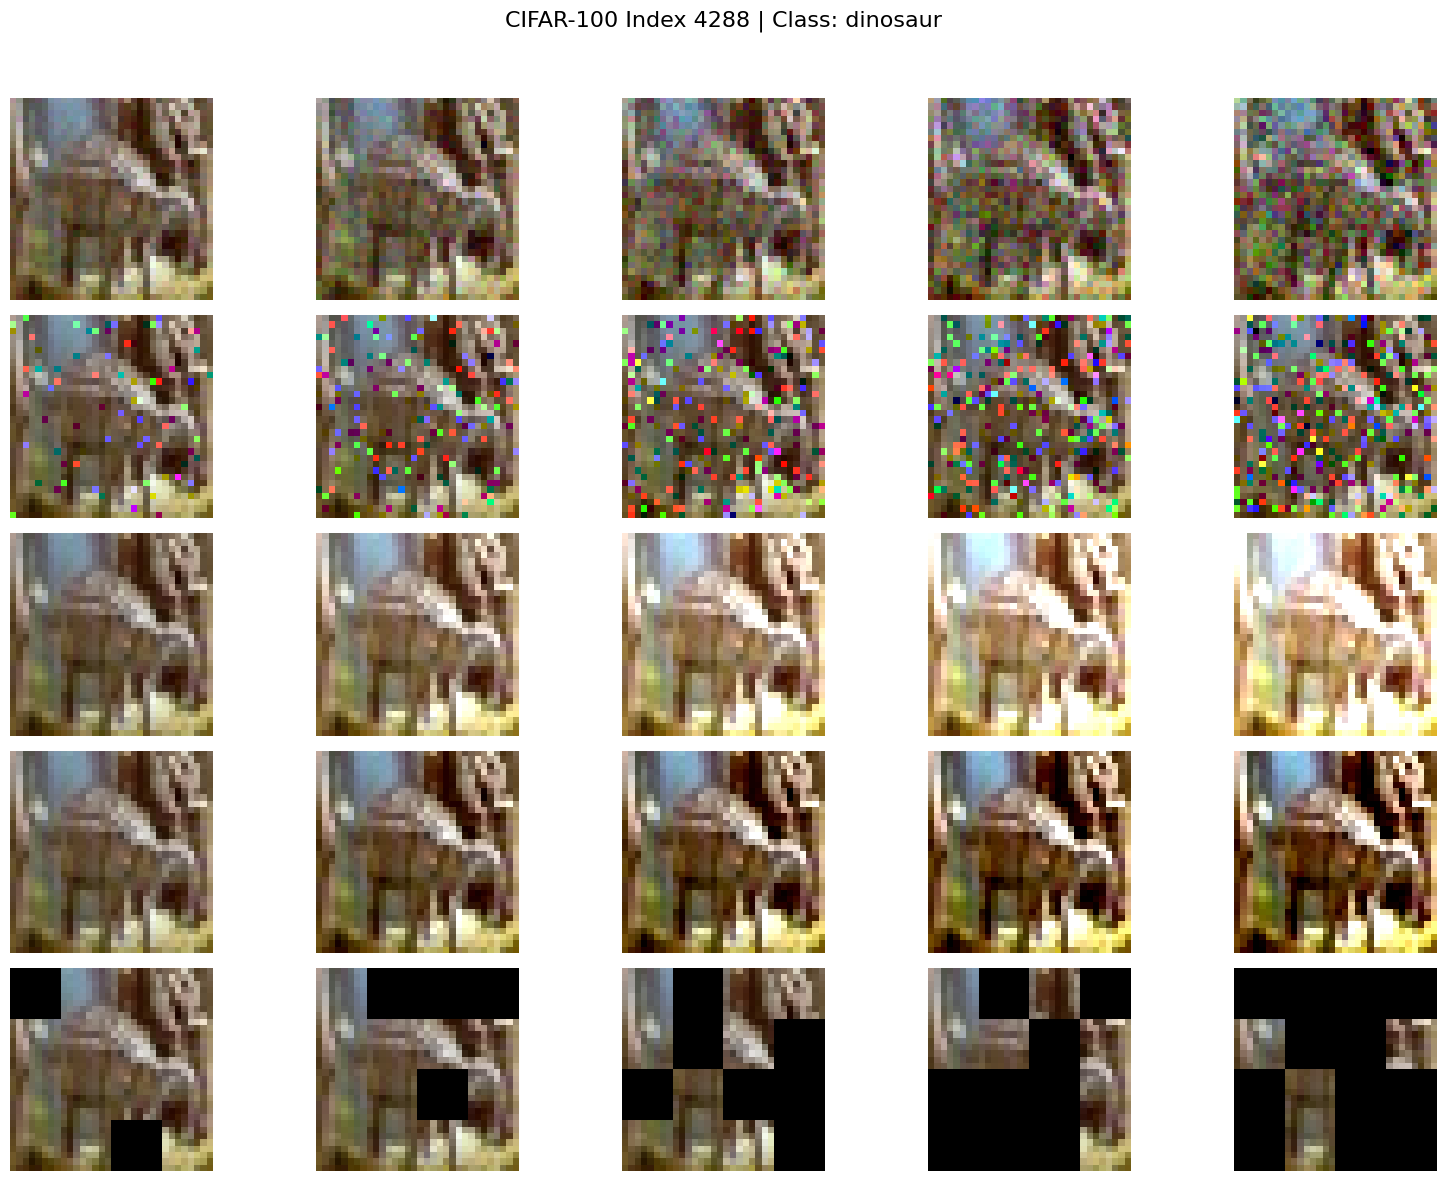

In [ ]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

idx = 4288

cifar_test = torchvision.datasets.CIFAR100(root='./data', train=False, download=True)
img, label = cifar_test[idx]
img_tensor = transforms.ToTensor()(img)

def add_gaussian(img_tensor, level):
    std = 0.02 * level
    return img_tensor + torch.randn_like(img_tensor) * std

def add_sp(img_tensor, level):
    sp_level = 0.08 * level  
    tensor = img_tensor.clone()
    c, h, w = tensor.shape
    num_salt = int(sp_level * h * w / 2)
    num_pepper = int(sp_level * h * w / 2)

    coords_salt = [torch.randint(0, i, (num_salt,)) for i in (c, h, w)]
    coords_pepper = [torch.randint(0, i, (num_pepper,)) for i in (c, h, w)]

    tensor[coords_salt[0], coords_salt[1], coords_salt[2]] = 1.0  # 
    tensor[coords_pepper[0], coords_pepper[1], coords_pepper[2]] = 0.0  # 

    return tensor


def change_brightness(img_tensor, level):
    factor = 1.0 + 0.25 * (level - 1)
    return transforms.functional.adjust_brightness(img_tensor, factor)

def change_contrast(img_tensor, level):
    factor = 1.0 + 0.25 * (level - 1)
    return transforms.functional.adjust_contrast(img_tensor, factor)

def random_patch_mask(img_tensor, patch_size=8, mask_ratio=0.15):
    img = img_tensor.clone()
    _, h, w = img.shape
    num_patches_h = h // patch_size
    num_patches_w = w // patch_size
    total_patches = num_patches_h * num_patches_w
    num_mask = int(total_patches * mask_ratio)
    mask_indices = torch.randperm(total_patches)[:num_mask]
    for idx in mask_indices:
        i = idx // num_patches_w
        j = idx % num_patches_w
        img[:, i*patch_size:(i+1)*patch_size, j*patch_size:(j+1)*patch_size] = 0.0
    return img

fig, axs = plt.subplots(5, 5, figsize=(16, 12))
perturb_names = ['Gaussian', 'Salt & Pepper', 'Brightness', 'Contrast', 'Patch Mask']

for col in range(5):
    axs[0, col].imshow(np.clip(add_gaussian(img_tensor, col+1).permute(1, 2, 0).numpy(), 0, 1))
    axs[1, col].imshow(np.clip(add_sp(img_tensor, col+1).permute(1, 2, 0).numpy(), 0, 1))
    axs[2, col].imshow(np.clip(change_brightness(img_tensor, col+1).permute(1, 2, 0).numpy(), 0, 1))
    axs[3, col].imshow(np.clip(change_contrast(img_tensor, col+1).permute(1, 2, 0).numpy(), 0, 1))
    axs[4, col].imshow(np.clip(random_patch_mask(img_tensor, 8, 0.15 * (col+1)).permute(1, 2, 0).numpy(), 0, 1))

for row in range(5):
    for col in range(5):
        axs[row, col].axis('off')
    axs[row, 0].set_ylabel(perturb_names[row], fontsize=14)

plt.suptitle(f'CIFAR-100 Index {idx} | Class: {cifar_test.classes[label]}', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
